# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [2]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# Packages for visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
import datetime as dt

# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe 
df0 = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 
pd.set_option('display.max_columns', None)

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


Purpose of conducting EDA:
* Getting a general and in-depth understanding of the dataset and variables.
* Descriptive stats are useful such as mean, mode, standard deviation, quartile, etc.
* Other tasks such as handling missing values, outliers, formatting, etc. on variables.
* Checking model assumptions is essential to determine if the chosen model will be a good candidate.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [4]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Start with `.shape` and `.info()`.

In [5]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
print(df0.shape)
print(df0.info())

(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [6]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
df0.isna().any(axis=1).sum()

0

In [7]:
df0.duplicated().sum()

0

In [8]:
df0.drop_duplicates(inplace=True)

Use `.describe()`.

In [9]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe(include='all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


### Task 2b. Convert pickup & dropoff columns to datetime


In [10]:
# Check the format of the data
### YOUR CODE HERE ###
df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [11]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [12]:
# Create `duration` column
### YOUR CODE HERE ###
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']) / np.timedelta64(1, 'm')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [13]:
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

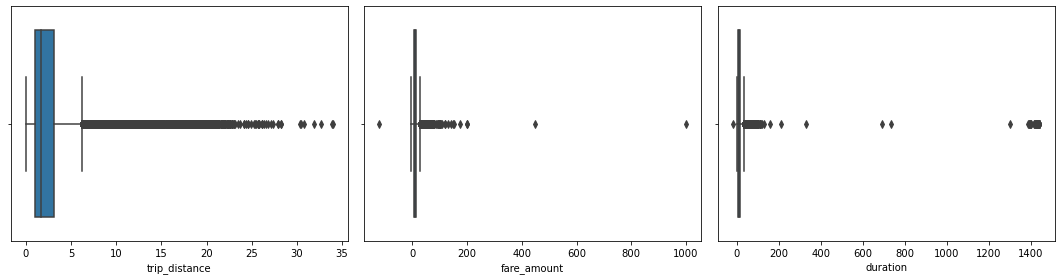

In [14]:
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Box plot for trip_distance
sns.boxplot(df0['trip_distance'], ax=ax[0])

# Box plot for fare_amount
sns.boxplot(df0['fare_amount'], ax=ax[1])

# Box plot for duration
sns.boxplot(df0['duration'], ax=ax[2])

# Get the plots to be tight together
plt.tight_layout()

# Show the plots
plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 
2. Are the values in the `trip_distance` column unbelievable?
3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. All the three variables do have outliers, which point out the right skew distribution.
2. First, it makes no sense that the trip distance contains values of 0, which is counterintuitive. Trips took typically about 1-3 miles, and the max(upper_whisker on the plot) is about 6 miles. However, there are quie a lot trips took more than that distance, which consider as outliers. 
3. About fares and durations, it completely makes no sense when contain negative values. There's no way to pay the fare with negative money, and negative minutes. That might show the concern of collecting datetime data which doesn't reflect the reality. 

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [15]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [16]:
### YOUR CODE HERE ###
df0[df0['trip_distance'] == 0].count()

Unnamed: 0               148
VendorID                 148
tpep_pickup_datetime     148
tpep_dropoff_datetime    148
passenger_count          148
trip_distance            148
RatecodeID               148
store_and_fwd_flag       148
PULocationID             148
DOLocationID             148
payment_type             148
fare_amount              148
extra                    148
mta_tax                  148
tip_amount               148
tolls_amount             148
improvement_surcharge    148
total_amount             148
duration                 148
dtype: int64

Total of 148 trips with 0 distance in the dataset. 

#### `fare_amount` outliers

In [17]:
### YOUR CODE HERE ###
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

It clearly shows the negative value in the minimum of fare amount, which is counterintuitive. 

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [18]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0['fare_amount'] = np.where(df0['fare_amount'] < 0, 0, df0['fare_amount'])
df0['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [19]:
### YOUR CODE HERE ###
def impute_outliers(columns, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
        # Reassign minimum to zero
    for col in columns:
        df0[col] = np.where(df0[col] < 0, 0, df0[col])

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr) 
        print(col)
        print('q3: ', q3)
        print('Upper threshold: ', upper_threshold)
        
        # Reassign values  > threshold to threshold
        df0[col] = df0[col].apply(lambda x: np.where(x > upper_threshold, upper_threshold, x))
        print(df0[col].describe())

In [20]:
impute_outliers(['fare_amount'], 6)

fare_amount
q3:  14.5
Upper threshold:  62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers


In [21]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [22]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df0['duration'] = np.where(df0['duration'] < 0, 0, df0['duration'])
df0['duration'].min()

0.0

In [23]:
# Impute the high outliers
### YOUR CODE HERE ###
impute_outliers(['duration'], 6)

duration
q3:  18.383333333333333
Upper threshold:  88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [24]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['PULocationID'].astype('str') + ' ' + df0['DOLocationID'].astype('str')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [25]:
### YOUR CODE HERE ###
grouped = df0.groupby(['pickup_dropoff'])[['trip_distance']].mean()
grouped

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
...,...
97 65,0.500000
97 66,1.400000
97 80,3.840000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [26]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict = grouped_dict.pop('trip_distance', None)
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [27]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['pickup_dropoff'].copy()

# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
### YOUR CODE HERE ###
df0[(df0['PULocationID'] == 186) & (df0['DOLocationID'] == 43)][['mean_distance']]

,mean_distance
1,3.108889
2892,3.108889
4350,3.108889
9818,3.108889
11522,3.108889
12043,3.108889
17262,3.108889
19112,3.108889
20385,3.108889


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [28]:
### YOUR CODE HERE ###
grouped = df0.groupby(['pickup_dropoff'])[['duration']].mean()

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df0['mean_duration'] = df0['pickup_dropoff'].copy()
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

# Confirm that it worked
### YOUR CODE HERE ###
df0[(df0['PULocationID'] == 186) & (df0['DOLocationID'] == 43)][['mean_duration']]

,mean_duration
1,24.47037
2892,24.47037
4350,24.47037
9818,24.47037
11522,24.47037
12043,24.47037
17262,24.47037
19112,24.47037
20385,24.47037


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [29]:
# Create 'day' col
### YOUR CODE HERE ###
df0['day'] = df0['tpep_pickup_datetime'].dt.strftime('%a')

# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['tpep_pickup_datetime'].dt.strftime('%b')

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Sat,Mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tue,Apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Fri,Dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sun,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Sat,Apr


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [30]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###
df0.loc[df0['day'].isin(['Sat', 'Sun']), 'rush_hour'] = 0
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Sat,Mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tue,Apr,14
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Fri,Dec,7
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sun,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Sat,Apr,0


In [31]:
### YOUR CODE HERE ###
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] <= 10:
        value = 1
    elif 16 <= hour['rush_hour'] <= 20:
        value = 1
    else:
        value = 0
        
    return value

In [32]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
df0['rush_hour'] = df0.apply(rush_hourizer, axis=1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Sat,Mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tue,Apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Fri,Dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sun,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Sat,Apr,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

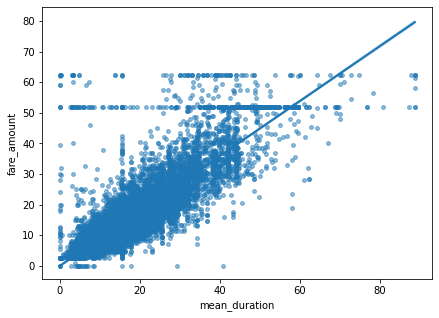

In [33]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
plt.figure(figsize=(7,5))
sns.regplot(data=df0, x='mean_duration', y='fare_amount', scatter_kws={'s':15, 'alpha':0.5});

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [34]:
### YOUR CODE HERE ###
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
51.0      7
60.0      6
55.0      6
51.5      6
53.0      4
52.5      4
61.0      3
62.0      3
55.5      3
56.0      3
56.5      3
58.5      2
59.5      2
61.5      2
57.0      2
54.0      2
58.0      1
54.7      1
54.5      1
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [35]:
# Set pandas to display all columns
### YOUR CODE HERE ###
df0[df0['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sun,Mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Sat,Jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Sat,Nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wed,Dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sun,Sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tue,Feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Mon,Jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thu,Aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tue,Sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sun,Apr,0


**Question:** What do you notice about the first 30 trips?

* The RatecodeId is all #2, which is the JFK (John F.Kenedy International Airport). Notice a bit is the #132 appears quite often in pickup location ID. 
* Mean distance and duration quitely stood out, which around ~ >16miles and ~>30min respectively.
* Tolls amounts is noticeable. While most we see the min is 0, others are 5 times larger. 
* By combining these observations, we might assume these trips = 52 dollars (the flat rate) fare amount majority taking place at the airport. 

In [36]:
df0[df0['fare_amount'] == 62.5].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,1,62.5,0.0,0.0,12.00,16.26,0.3,96.81,47.816667,138 265,20.552000,39.376667,Wed,Oct,0
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,62.5,0.5,0.5,18.56,11.52,0.3,111.38,88.783333,132 23,30.830000,88.783333,Mon,Nov,1
174,53109134,1,2017-06-22 14:22:05,2017-06-22 16:07:28,1,16.90,1,N,230,219,2,62.5,0.0,0.5,0.00,0.00,0.3,72.30,88.783333,230 219,16.900000,88.783333,Thu,Jun,0
176,50046493,2,2017-06-13 20:05:03,2017-06-13 20:42:53,1,18.05,3,N,163,1,2,62.5,0.5,0.0,0.00,10.50,0.3,80.80,37.833333,163 1,18.050000,37.833333,Tue,Jun,1
316,61694138,2,2017-07-20 13:21:55,2017-07-20 14:21:20,1,17.86,3,N,170,1,1,62.5,0.0,0.0,0.00,16.50,0.3,94.80,59.416667,170 1,16.876667,38.955556,Thu,Jul,0
414,12955020,2,2017-02-18 12:44:04,2017-02-18 13:29:10,6,25.69,1,N,132,106,1,62.5,0.0,0.5,14.06,0.00,0.3,84.36,45.100000,132 106,20.200000,40.483333,Sat,Feb,0
908,25075013,2,2017-03-27 13:01:38,2017-03-27 13:38:44,2,26.12,4,N,138,265,1,62.5,0.0,0.5,15.00,5.76,0.3,121.56,37.100000,138 265,20.552000,39.376667,Mon,Mar,0
1452,52456948,2,2017-06-20 18:06:54,2017-06-20 19:17:33,3,23.67,1,N,90,39,2,62.5,1.0,0.5,0.00,5.76,0.3,73.56,70.650000,90 39,23.670000,70.650000,Tue,Jun,1
1687,97335278,1,2017-11-16 20:54:32,2017-11-16 22:09:21,2,18.80,1,N,231,175,2,62.5,0.5,0.5,0.00,0.00,0.3,65.30,74.816667,231 175,18.800000,74.816667,Thu,Nov,1
1876,3544907,2,2017-01-13 16:25:47,2017-01-13 17:42:09,2,18.80,1,N,132,65,2,62.5,1.0,0.5,0.00,0.00,0.3,64.80,76.366667,132 65,15.686000,69.990000,Fri,Jan,1


### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [37]:
### YOUR CODE HERE ###
df_subset = df0.copy()
df_subset = df0.drop(columns=['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                              'PULocationID', 'DOLocationID', 'extra', 'mta_tax', 'improvement_surcharge',
                              'tolls_amount', 'store_and_fwd_flag', 'RatecodeID', 'day', 'month',
                              'tip_amount', 'total_amount', 'pickup_dropoff', 'payment_type',
                              'trip_distance', 'duration'])

In [38]:
### YOUR CODE HERE ###
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

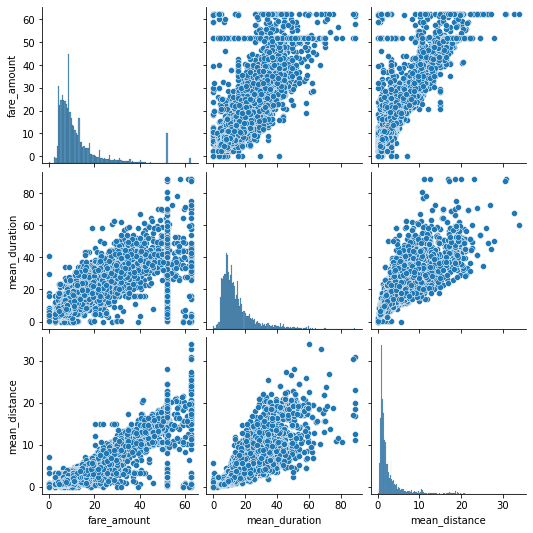

In [39]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(df_subset[['fare_amount', 'mean_duration', 'mean_distance']])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [40]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
df_subset.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.000752
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.024283
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.025901
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.046794
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.027499
rush_hour,-0.000752,-0.024283,-0.025901,-0.046794,-0.027499,1.000000


Visualize a correlation heatmap of the data.

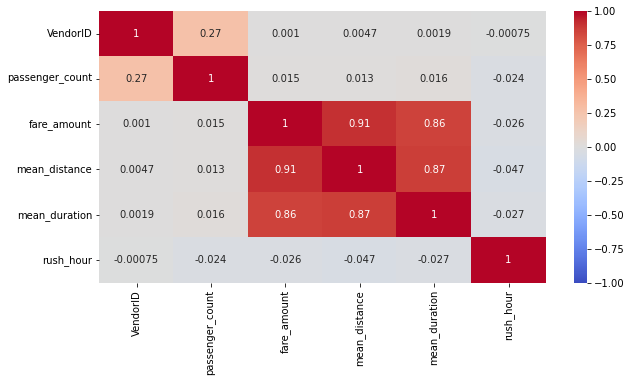

In [41]:
# Create correlation heatmap
### YOUR CODE HERE ###
plt.figure(figsize=(10, 5))
sns.heatmap(df_subset.corr(method='pearson'), annot=True, cmap='coolwarm',
            vmin=-1, vmax=1);

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? All the variables are correlated, with the mean distance and duration are noticeable with highly correlated. In other words, these two are the most influential variables to the fare amount of taxi rides.

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [42]:
# Remove the target column from the features
X = df_subset.drop(columns='fare_amount')

# Set y variable
y = df_subset[['fare_amount']]

# Display first few rows
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [43]:
y.head()

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


### Task 8b. Pre-process data


Dummy encode categorical variables

In [44]:
# Convert VendorID to string
### YOUR CODE HERE ###
X['VendorID'] = X['VendorID'].astype('str')

# Get dummies
### YOUR CODE HERE ###
X = pd.get_dummies(X, columns=['VendorID'], drop_first=True)

X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [45]:
# Create training and testing sets
#### YOUR CODE HERE ####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18159, 5), (4540, 5), (18159, 1), (4540, 1))

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [47]:
# Standardize the X variables
### YOUR CODE HERE ###
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [48]:
X_train_scaled[:10]

array([[-0.50301524,  0.8694684 ,  0.17616665, -0.77153979,  0.89286563],
       [-0.50301524, -0.60011281, -0.69829589,  1.29610943,  0.89286563],
       [ 0.27331093, -0.47829156, -0.57301906, -0.77153979, -1.11998936],
       [-0.50301524, -0.5628138 , -0.7805303 ,  1.29610943, -1.11998936],
       [-0.50301524, -0.56172591, -0.81192972,  1.29610943, -1.11998936],
       [ 0.27331093,  0.02651065,  0.83349185,  1.29610943,  0.89286563],
       [-0.50301524, -0.56172591, -0.81192972, -0.77153979, -1.11998936],
       [-0.50301524, -0.49508218, -0.57576937, -0.77153979,  0.89286563],
       [-0.50301524,  0.46244289,  1.17865634, -0.77153979,  0.89286563],
       [-0.50301524,  1.32265144,  0.55694771, -0.77153979, -1.11998936]])

### Fit the model

Instantiate your model and fit it to the training data.

In [49]:
# Fit your model to the training data
### YOUR CODE HERE ###
clf = LinearRegression()
clf.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [50]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
print('Training score: ', clf.score(X_train_scaled, y_train))

y_pred_train = clf.predict(X_train_scaled)
print('R2 score: ', metrics.r2_score(y_train, y_pred_train))
print('MSE: ', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE: ', metrics.mean_squared_error(y_train, y_pred_train, squared=False))
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred_train))

Training score:  0.839866631223281
R2 score:  0.839866631223281
MSE:  17.887144535024106
RMSE:  4.229319630274366
MAE:  2.186238565532888


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [51]:
# Scale the X_test data
### YOUR CODE HERE ###
X_test_scaled = scaler.transform(X_test)
X_test_scaled[:10]

array([[-0.50301524, -0.01228033, -0.1109662 , -0.77153979,  0.89286563],
       [-0.50301524,  0.1705781 ,  0.83266676,  1.29610943,  0.89286563],
       [ 0.27331093, -0.56800902, -0.71163492, -0.77153979,  0.89286563],
       [-0.50301524,  0.45609489,  0.07728226, -0.77153979,  0.89286563],
       [ 0.27331093, -0.26250187, -0.17085834, -0.77153979, -1.11998936],
       [-0.50301524,  0.75582296,  0.94597972, -0.77153979, -1.11998936],
       [-0.50301524,  2.03879254,  3.42208799, -0.77153979, -1.11998936],
       [-0.50301524,  3.00390456,  1.24878936, -0.77153979,  0.89286563],
       [-0.50301524,  0.96807767,  1.09449671,  1.29610943,  0.89286563],
       [-0.50301524, -0.41754745, -0.38631198,  1.29610943,  0.89286563]])

In [52]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
print('Test score: ', clf.score(X_test_scaled, y_test))

y_pred = clf.predict(X_test_scaled)
print('R2 score: ', metrics.r2_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))

Test score:  0.8682469790456719
R2 score:  0.8682469790456719
MSE:  14.327692251527624
RMSE:  3.7851938195457873
MAE:  2.1336582291943444


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [53]:
# Create a `results` dataframe
### YOUR CODE HERE ###
results = pd.DataFrame({'actual': y_test['fare_amount'],
                        'predicted': y_pred.ravel()})
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
5818,14.0,12.333763,1.666237
18134,28.0,16.542899,11.457101
4655,5.5,6.703877,-1.203877
7378,15.5,16.205251,-0.705251
13914,9.5,10.514265,-1.014265
...,...,...,...
11108,21.5,20.670330,0.829670
7840,5.5,5.912060,-0.412060
8,9.0,7.128079,1.871921
16996,7.0,6.673236,0.326764


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

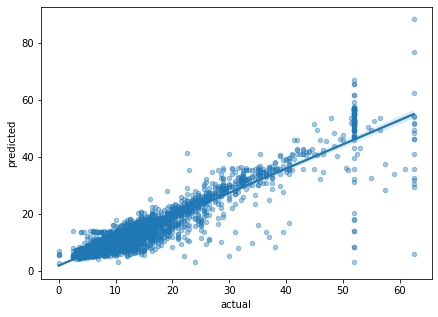

In [54]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###
plt.figure(figsize=(7, 5))
sns.regplot(data=results, x='actual', y='predicted', scatter_kws={'s': 20, 'alpha': 0.4})

Visualize the distribution of the `residuals` using a histogram.

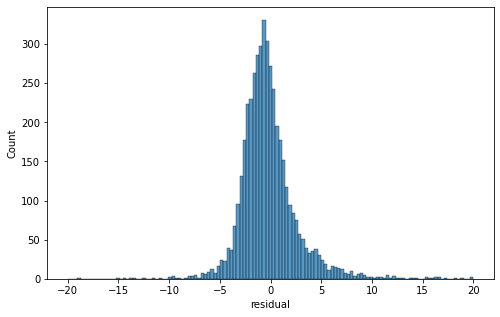

In [55]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.histplot(results['residual'], binrange=(-20, 20));

In [56]:
# Calculate residual mean
### YOUR CODE HERE ###
results['residual'].mean()

-0.015181994717796892

The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

Create a scatterplot of `residuals` over `predicted`.

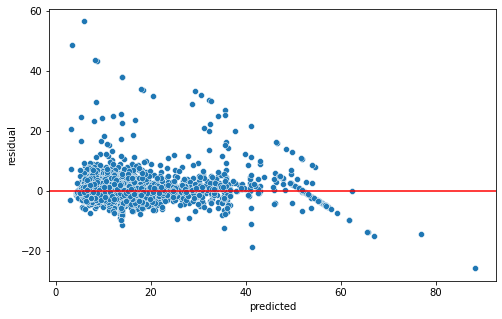

In [57]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
plt.figure(figsize=(8, 5))
sns.scatterplot(data=results, x='predicted', y='residual')
plt.axhline(0, c='red') 

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of \\$62.50  and the flat rate of \\$52 for JFK airport trips.

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [58]:
clf.intercept_

array([12.89174624])

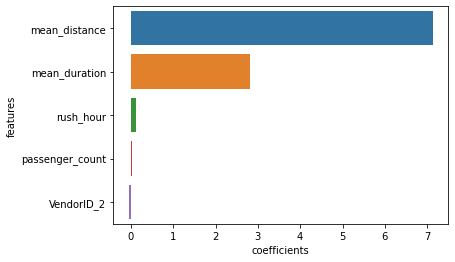

In [59]:
# Output the model's coefficients
coef = pd.DataFrame({'features': X_train.columns,
                     'coefficients': clf.coef_[0]}).sort_values('coefficients', ascending=False)

sns.barplot(x=coef['coefficients'], y=coef['features'])

In [60]:
coef

,features,coefficients
1,mean_distance,7.135758
2,mean_duration,2.811583
3,rush_hour,0.121491
0,passenger_count,0.031544
4,VendorID_2,-0.054611


What do these coefficients mean? How should they be interpreted?

So each coefficient can interpret as the increase or decrease of y variable (fare_amount) that accounts for one-unit increase in each. We easily detect that the mean_distance is the most influential variable to the fare amount. Specifically, if we increase one-unit of mean distance, we expect the fare amount to increase by 7.13 dollars on average (wrong).

The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of 7.13. This is incorrect. Remember, the data used to train the model was standardized with StandardScaler(). As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of 7.13.

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data). 

1. Calculate the standard deviation of `mean_distance` in the `X_train` data.

2. Divide the coefficient (7.135758) by the result to yield a more intuitive interpretation.

In [61]:
# Calculate the standard deviation of mean distance
print(X_train['mean_distance'].std())

# Calculate the correct change in mean_distance by using coefficient / std 
print(7.135758 / X_train['mean_distance'].std())

3.574812975256415
1.996120650056711


So, we can say that for every 3.57 miles traveled in distance, the fare amount increases by a mean of 7.13 dollars. Another thing we can say is for every one-mile traveled, we expect the fare amount increases by a mean of 2.00 dollars.

# BONUS CONTENT

More work must be done to prepare the predictions to be used as inputs into the model for the upcoming course. This work will be broken into the following steps:

1. Get the model's predictions on the full dataset.

2. Impute the constant fare rate of \$52 for all trips with rate codes of `2`.

3. Check the model's performance on the full dataset.

4. Save the final predictions and `mean_duration` and `mean_distance` columns for downstream use.

### 1. Predict on the full dataset

In [62]:
X_scaled = scaler.transform(X)
y_pred_full = clf.predict(X_scaled)

### 2. Impute ratecode 2 fare

The data dictionary says that the `RatecodeID` column captures the following information:

1 = standard rate  
2 = JFK (airport)  
3 = Newark (airport)  
4 = Nassau or Westchester  
5 = Negotiated fare  
6 = Group ride  

This means that some fares don't need to be predicted. They can simply be imputed based on their rate code. Specifically, all rate codes of `2` can be imputed with \$52, as this is a flat rate for JFK airport.

The other rate codes have some variation (not shown here, but feel free to check for yourself). They are not a fixed rate, so these fares will remain untouched.

Impute `52` at all predictions where `RatecodeID` is `2`.

In [63]:
# Copy the RatecodeID column from the original datset
final_predict = df0[['RatecodeID']].copy()

# Add the predict full column
final_predict['Predicted'] = y_pred_full

# Impute 52 at all predictions where RatecodeID is 2
final_predict.loc[final_predict['RatecodeID'] == 2, 'Predicted'] = 52

# Get the first few rows
final_predict[final_predict['RatecodeID'] == 2].head(10)

,RatecodeID,Predicted
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0
388,2,52.0
406,2,52.0
449,2,52.0
468,2,52.0
520,2,52.0


### Check performance on full dataset

In [64]:
y_pred_all = final_predict['Predicted']

print('R2 score: ', metrics.r2_score(y, y_pred_all))
print('MSE: ', metrics.mean_squared_error(y, y_pred_all))
print('RMSE: ', metrics.mean_squared_error(y, y_pred_all, squared=False))
print('MAE: ', metrics.mean_absolute_error(y, y_pred_all))

R2 score:  0.8910948478397098
MSE:  12.100525511951446
RMSE:  3.4785809623970874
MAE:  1.9922578384303216


### Save final predictions with `mean_duration` and `mean_distance` columns

In [65]:
final_pred = df0[['mean_duration', 'mean_distance']].copy()
final_pred['predict_full'] = y_pred_all

final_pred.head(10)

,mean_duration,mean_distance,predict_full
0,22.847222,3.521667,16.414142
1,24.470370,3.108889,16.029496
2,7.250000,0.881429,7.040514
3,30.250000,3.700000,18.708458
4,14.616667,4.435000,15.823662
5,11.855376,2.052258,10.421050
6,59.633333,12.830000,45.364431
7,26.437500,4.022500,18.542107
8,7.873457,1.019259,7.128079
9,10.541111,1.580000,9.099959


### Task 9d. Conclusion

##### What are the key takeaways from this notebook?
* Multiple linear regression might be a complex model to instantiate (accounts for more variables) than a simple linear regression, but it can lead to better and well-achieved results.
* As always, EDA process is crucical to understand variables and detect problems in advance (missing values, outliers, format).
* Feature selection, transformation, and engineering also play the vital role by creating helpful variables to have the influence on the target variable, and carefully pick variables that are useful.
* Checking model assumptions before and after building the model are necessary to make sure it's met all the conditions.
* Evaluating the model by some key metrics to understand how good or bad of the model's performance.

##### What results can be presented from this notebook?
* Comparing metrics (R-squared, MAE, RMSE) after developing the model on both training and test sets shows a bit of difference. Metrics like MAE & RMSE on the test set are better than the training set since we account for the smallest values (2.13 vs. 2.18, and 3.78 & 4.23 respectively).
* However, the r-squared is higher on the test set (86.8%) vs. training (84%). This number shows the proportion of variance in fare_amount can be explained by the predictor variables. Since this value is pretty high on the test set, it might indicate a data leakage problem.
* Most of the assumptions met the model's condition, except we accounted for variables (mean_distance & mean_duration). These are highly correlated to the fare_amount, but they are also correlated to each other (multicollinearity).
* In this model, `mean_distance` is the most influential variable to the fare_amount. Specifically, if we increase every 3.57 miles traveled (by one standard deviation), we expect the fare amount will increase by \\$7.13 on average. On reduced, if we increase every one mile traveled, the fare amount will increase by \\$2.00 on average.
* Overall, we can improve the model by considering adding more variables to help on predicting the target one. We also want to immediately take care of the problems we stated above. Additionally, there are many models we can consider to develop in order to boost the prediction's accuracy and performance. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 